Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
len(df)

7043

## Initial data preparation

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_') 

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

print(df['multiplelines'].head())

0    no_phone_service
1                  no
2                  no
3    no_phone_service
4                  no
Name: multiplelines, dtype: object


In [7]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0)

In [8]:
df['totalcharges'].isnull().sum()

np.int64(0)

In [9]:
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_3335/3233022047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})


In [10]:
df.churn.dtype

dtype('int64')

## __Setting up the validation framework__
Perform the train/validation/test split with Scikit_Learn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [17]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [108]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [18]:
len(df.columns)

21

## Exploratory data analysis
* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [21]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [22]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [23]:
numerical = ['tenure', 'monthlycharges','totalcharges']

In [24]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
categorical =['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [26]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

In [27]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female.item()

0.27682403433476394

In [28]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male.item()

0.2632135306553911

In [29]:
global_churn = df_full_train.churn.mean()
global_churn.item()

0.26996805111821087

In [30]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [31]:
df_full_train[df_full_train.partner == 'yes'].churn.mean().item()

0.20503330866025166

In [32]:
df_full_train[df_full_train.partner == 'no'].churn.mean().item()

0.3298090040927694

In [33]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean']/global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# __Mutual Information__

In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [36]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [37]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [38]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [39]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [40]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# __Correlation__

In [41]:
df_full_train.tenure.max()

72

In [42]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [43]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [44]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [45]:
df_full_train[df_full_train.tenure >12].churn.mean()

np.float64(0.17634908339788277)

## One-hot encoding
+ Use Scikit-Learn to encode categorical features


In [46]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [48]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [49]:
dv = DictVectorizer(sparse=False)

In [50]:
X_train = dv.fit_transform(train_dicts)

In [51]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [52]:
X_val = dv.fit_transform(val_dicts)

In [53]:
X_train.shape

(4225, 45)

In [54]:
X_val.shape

(1409, 45)

In [55]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Logistic regression
+ linear vs logistic regression
+ bineary classification

In [56]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

z = np.linspace(-5, 5, 51)

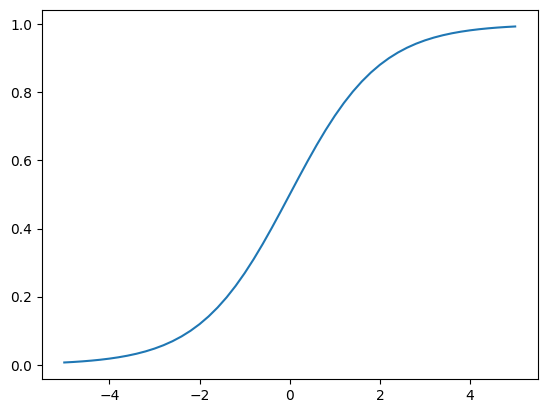

In [57]:
plt.plot(z, sigmoid(z))

In [58]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j]*w[j]

    return result

In [59]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = result + xi[j]*w
    result = sigmoid(score)
    return score

## Training logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [62]:
model.intercept_[0].item()

-0.12193448146460852

In [63]:
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [64]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [65]:
y_pred = model.predict_proba(X_val)[:,1]

In [66]:
churn_decision = (y_pred >= 0.5)

In [67]:
df_val[churn_decision].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
24,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30


In [68]:
(y_val == churn_decision).mean()

np.float64(0.8055358410220014)

In [69]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [70]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred['correct'].mean()

np.float64(0.8055358410220014)

In [71]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

## Model interpretation

In [72]:
coef_dict = dict(zip(dv.get_feature_names_out(), model.coef_[0]))

In [73]:
coef_dict = {key: value.item() for key, value in coef_dict.items()}

In [74]:
coef_dict

{'contract=month-to-month': 0.6065215428340286,
 'contract=one_year': -0.05770891645255006,
 'contract=two_year': -0.6707471078460865,
 'dependents=no': -0.02788861221603945,
 'dependents=yes': -0.09404586924855608,
 'deviceprotection=no': 0.05212063313673173,
 'deviceprotection=no_internet_service': -0.10268187844642908,
 'deviceprotection=yes': -0.07137323615487173,
 'gender=female': -0.04200022945668578,
 'gender=male': -0.07993425200788856,
 'internetservice=dsl': -0.3758001102978017,
 'internetservice=fiber_optic': 0.35654750727964446,
 'internetservice=no': -0.10268187844642908,
 'monthlycharges': 0.0023599742876003306,
 'multiplelines=no': -0.24763512357983358,
 'multiplelines=no_phone_service': 0.13344279736016165,
 'multiplelines=yes': -0.007742155244911444,
 'onlinebackup=no': 0.0566161757917909,
 'onlinebackup=no_internet_service': -0.10268187844642908,
 'onlinebackup=yes': -0.07586877880994024,
 'onlinesecurity=no': 0.21693629064864386,
 'onlinesecurity=no_internet_service'

In [75]:
small = ['contract','tenure','monthlycharges']

In [76]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [77]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [106]:
dicts_train_small[:10]

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [78]:
dv_small = DictVectorizer(sparse=False)

In [79]:
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [107]:
dv_small

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [80]:
X_train_small = dv_small.transform(dicts_train_small)

In [109]:
X_train_small

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]], shape=(4225, 5))

In [81]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
w0 = model_small.intercept_[0]
w0.item()

-2.477957595829565

In [83]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [84]:
coef_dict_s = dict(zip(dv_small.get_feature_names_out(), w.round(3)))
coef_dict_s = {key: value for key, value in coef_dict.items()}
coef_dict_s

{'contract=month-to-month': 0.6065215428340286,
 'contract=one_year': -0.05770891645255006,
 'contract=two_year': -0.6707471078460865,
 'dependents=no': -0.02788861221603945,
 'dependents=yes': -0.09404586924855608,
 'deviceprotection=no': 0.05212063313673173,
 'deviceprotection=no_internet_service': -0.10268187844642908,
 'deviceprotection=yes': -0.07137323615487173,
 'gender=female': -0.04200022945668578,
 'gender=male': -0.07993425200788856,
 'internetservice=dsl': -0.3758001102978017,
 'internetservice=fiber_optic': 0.35654750727964446,
 'internetservice=no': -0.10268187844642908,
 'monthlycharges': 0.0023599742876003306,
 'multiplelines=no': -0.24763512357983358,
 'multiplelines=no_phone_service': 0.13344279736016165,
 'multiplelines=yes': -0.007742155244911444,
 'onlinebackup=no': 0.0566161757917909,
 'onlinebackup=no_internet_service': -0.10268187844642908,
 'onlinebackup=yes': -0.07586877880994024,
 'onlinesecurity=no': 0.21693629064864386,
 'onlinesecurity=no_internet_service'

## Using the model

In [85]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [86]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [87]:
y_full_train = df_full_train.churn.values

In [88]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [89]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [90]:
X_test = dv.transform(dicts_test)

In [91]:
y_pred = model.predict_proba(X_test)[:,1]

In [92]:
churn_decision = (y_pred >= 0.5)

In [93]:
(churn_decision == y_test).mean()

np.float64(0.8126330731014905)

In [94]:
dicts_test[-1]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [95]:
customer = dicts_test[-1]

In [96]:
x_small = dv.transform([customer])

In [97]:
x_small.shape

(1, 45)

In [98]:
model.predict_proba(x_small)[0,1]

np.float64(0.6434116900130904)

In [99]:
y_test[-1]

np.int64(1)

## __Summary__